# Assignment #3 - Neural Networks

### <font color="red"> DUE: Oct 29 (Tuesday) 11:00 pm </font>  

<font color="blue"> <b>Kruti Raval</b> </font>

# I. Overview

The main objective for this assignment is to learn Neural Networks and implement various neural network algorithms. Neural networks are actually a set of algorithms, modeled loosely after the human brain, that are designed and used to recognize patterns. By labeling or clustering raw input, the neural networks interpret sensory data through a kind of machine perception. The purpose of a neural network is to learn to recognize patterns in the data. Once the neural network has been trained on the same of data (we have used regression data here), it can make predictions by detecting similar patterns in future data. In this assignment we will learn about Cross Validation, Nonlinear Regression and Nonlinear Logistic Regression for our neural network Models.


### Approach
The main approach to achieve our goal is by using and implementing 5-fold cross validation to find good neural network parameters and report the accuracy. Understanding Nonlinear Regression and implementing Nonlinear logistic Regression with toy data is done which proves to be useful in analyzing the results.
From the results of cross validation, we can choose and decide about the parameter and network structure choice. From all these implementation and prediction results, we can analyze about the learning of nonlinear regression models.


# II. Data

### Description

The dataset named **Physicochemical Properties of Protein Tertiary Structure** is used for regression which has 45,730 samples and 10 feature values. The dataset shows the protein structure. Using this dataset and infering results from it, we can get a better understanding and analysis of protein structures and regression models for Root Mean Square Deviation (RMDS) prediction.

Feature values for the dataset are as follows:<br/>

RMSD -> Size of the residue.<br/>
F1 -> Total surface area.<br/>
F2 -> Non polar exposed area.<br/>
F3 -> Fractional area of exposed non polar residue.<br/>
F4 -> Fractional area of exposed non polar part of residue.<br/>
F5 -> Molecular mass weighted exposed area.<br/>
F6 -> Average deviation from standard exposed area of residue.<br/>
F7 -> Euclidian distance.<br/>
F8 -> Secondary structure penalty.<br/>
F9 -> Spacial Distribution constraints (N,K Value).<br/>

### Source

Prashant Singh Rana, ABV - Indian Institute of Information Technology & Management, Gwalior, MP, India.

In [124]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from nn import NeuralNet
from util import Standardizer
from grad import scg
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
%matplotlib inline

In [125]:
#Reading the data
dfReg = pd.read_csv("CASP.csv")
dfReg

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140


### Preprocessing the Data

Checking for the null values in the dataset and taking necessary actions for the same.

In [126]:
#Checking null values
dfReg.any().isnull()

RMSD    False
F1      False
F2      False
F3      False
F4      False
F5      False
F6      False
F7      False
F8      False
F9      False
dtype: bool

#### Data Cleaning

There are no null or missing values in the data set. If there were any, we could either remove the entire instance with null values or replace the null value with the mean of that attribute to clean the data.

In [127]:
#Getting information of the data
dfReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
RMSD    45730 non-null float64
F1      45730 non-null float64
F2      45730 non-null float64
F3      45730 non-null float64
F4      45730 non-null float64
F5      45730 non-null float64
F6      45730 non-null float64
F7      45730 non-null float64
F8      45730 non-null int64
F9      45730 non-null float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [128]:
# Data and value description
dfReg.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


## Plots for visualizing the data

It is the graphical representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This is achieved via mapping between graphic marks and data values for visualization.

##### Pairplot
plots pairwise relationships in the data. A grid of Axes will be created such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column. The diagonal axes shows the uninvariate distribution for variable in that column.<br/>
data - dataframe<br/>
hue - map plots aspects in different color for identification<br/>
palette - set of colors for maping hue variables

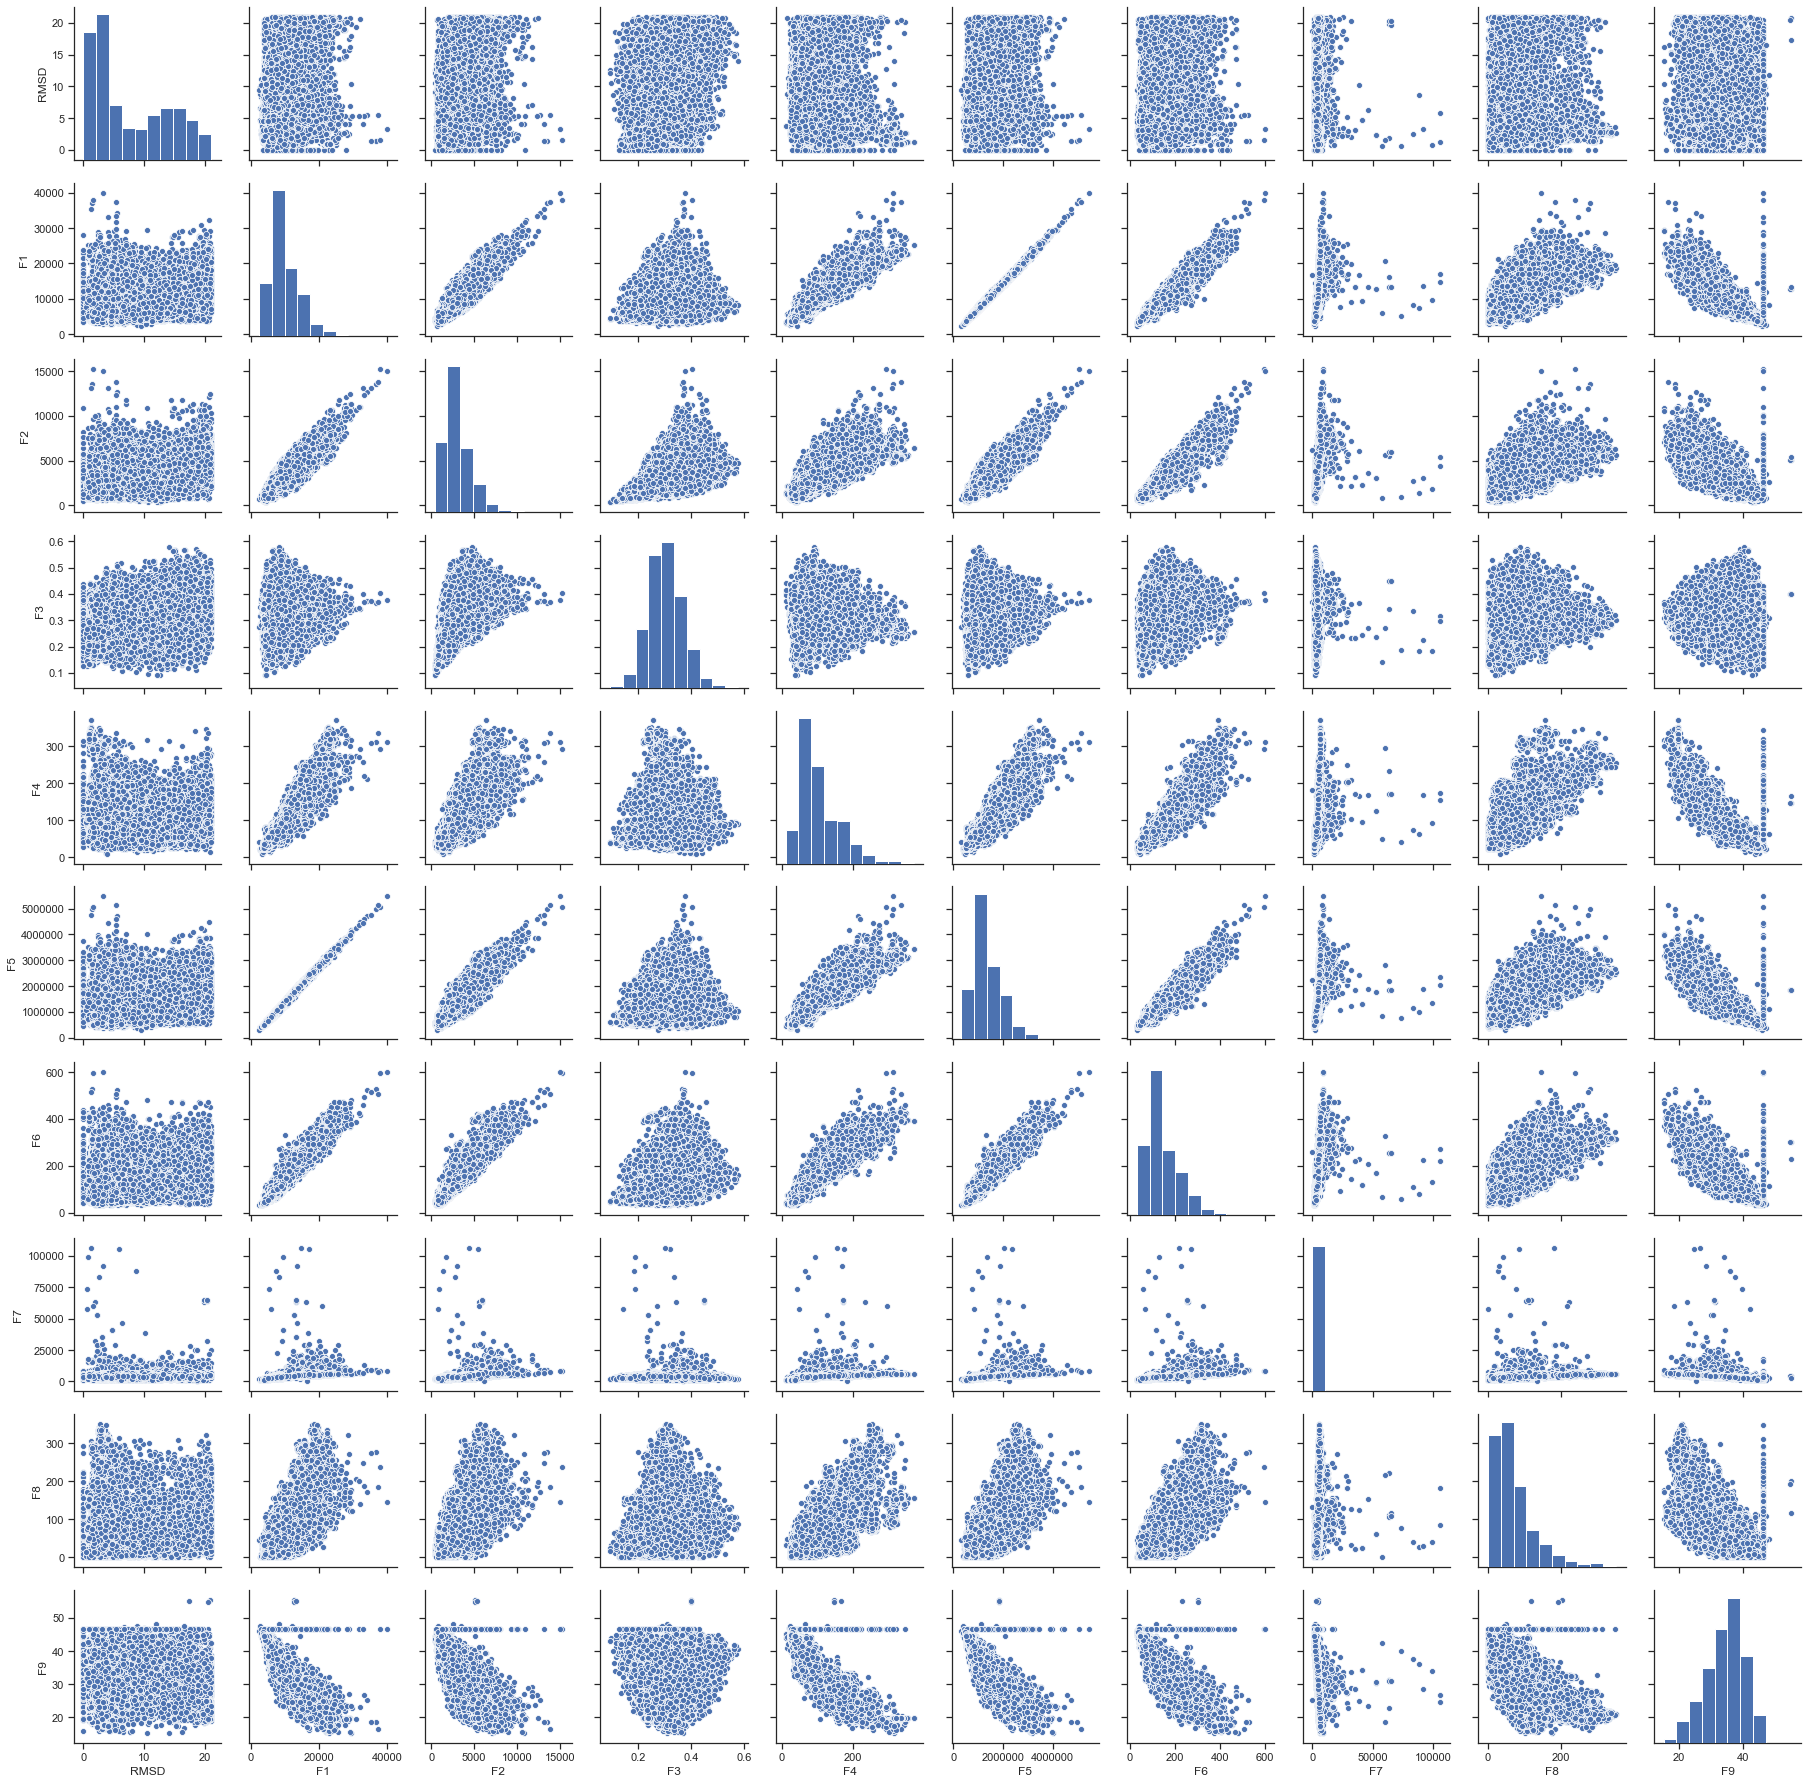

In [129]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dfReg)

##### Heatmap

It is graphical representation of data using color code and color intensity system. It represents the correlation of the feature values in the data.

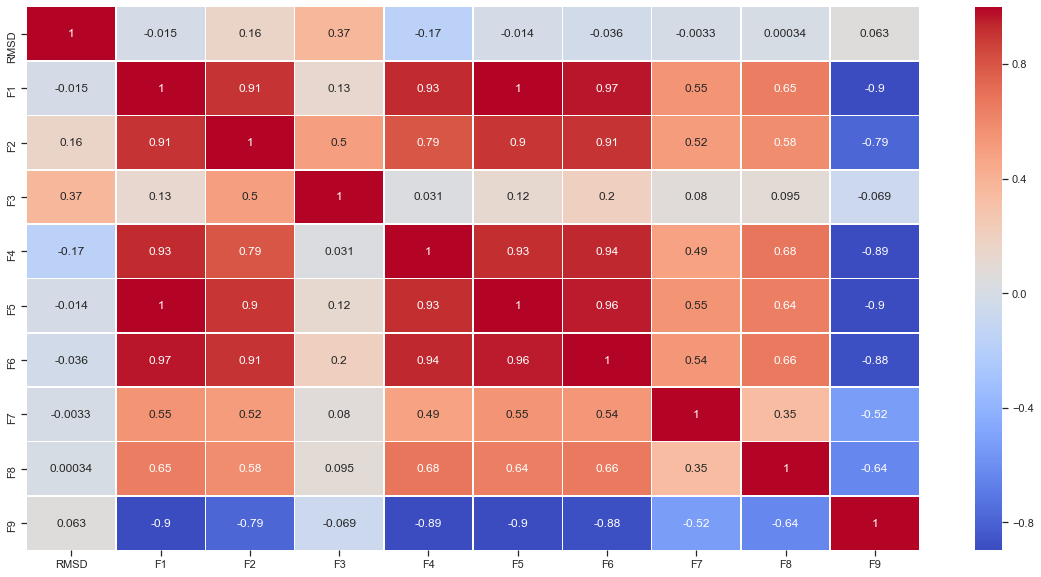

In [130]:
plt.figure(figsize=(20,10))
sns.heatmap(dfReg.corr(),annot=True, lineWidth = 0.5, cmap='coolwarm')

##### Boxplot

 It represents the statistical data on the basis of maximum, minimum and the intermediate quartiles.

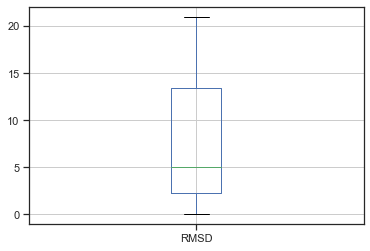

In [131]:
dfReg.boxplot(column='RMSD')

##### LMplot

It fits regression models into conditional data sets. 

Text(0.5, 1, 'LM Plot between F1 and F5')

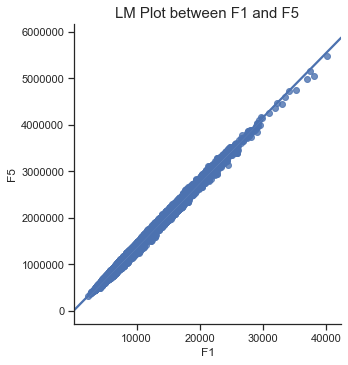

In [132]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.lmplot(x = 'F1', y = 'F5', data = dfReg, x_jitter = 0.05)
plt.title('LM Plot between F1 and F5', fontsize = 15)

##### Histogram

It shows the occurance and frequency of the data variable for each instance in the form of rectangular bars.

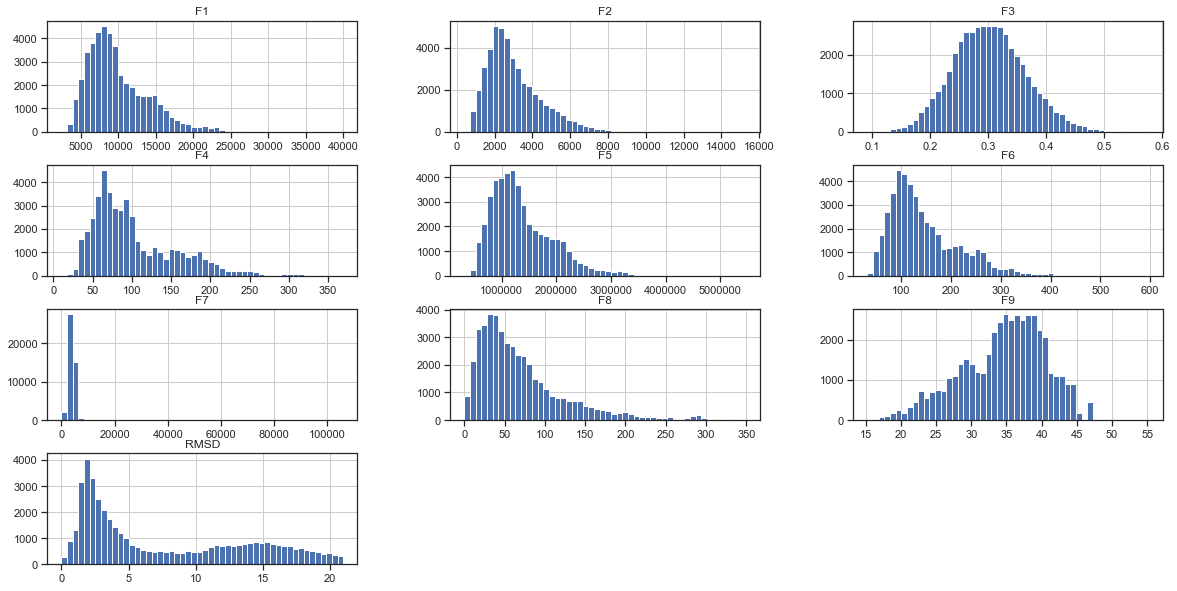

In [133]:
dfReg.hist(bins=50, figsize=(20,10))
plt.show()

In [134]:
dfReg_target = dfReg.iloc[:, 0:1]
dfReg_target

,RMSD
0,17.284
1,6.021
2,9.275
3,15.851
4,7.962
5,1.700
6,9.314
7,1.985
8,1.915
9,1.495


In [135]:
dfReg = dfReg.iloc[:, 1:10]
dfReg

,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140


In [136]:
dfReg.shape

(45730, 9)

In [137]:
 dfReg_target.shape

(45730, 1)

## Reading and Analyzing the plots

**Pairplot**: Relation between various features of dataset are visualized. Distribution of single variables as well as relation between two variables is described through this graph. From the graph we can see that all the attributes are mapped to one another showing relation to eachother. According to the relation with the target feature (RMSD), we can see the corresponding values and correlations with it for transforming the values. It also shows non linear behaviour of data.

**Heatmap**: From intensity of colors and the corresponding values between the attributes, we can know the co-relation among each variable. It shows linear behaviour of data. The diagonal shows mapping of each variable with itself and so the value is 1 i.e maximum correlation. Feature F1 and F5 have the maximum correlation (1) and Feature F1 and F9 as well as F5 and F9 have the minimum correlation (-0.9) between them as we can see from the graph.

**Boxplot**: It represents the statistical data on the basis of maximum, minimum and the intermediate quartiles. As shown in the graph, the target value RMSD lies in the range of 0 to 23, where 0 is the minimum value, 23 is the maximum target value and intermediate quartiles lies from 3 to 14. 

**LMplot**: It fits regression models into conditional data sets. On the basis of occurance of values an estimation is made and shown via the straight line to get the best value. As we have seen that Feature F1 and F5 are correlated, so the linear model is more accurate and close to the original values. 

**Histogram**: It shows frequency of the occurance of data. For each feature value, the occurance of each instance at a particular value is mapped and we can thus see the pattern and distribution of the data very precisely.

# III. Methods

## III.A 5-fold Cross Validation

### Summary

Cross-validation is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a training data set, and a testing data set of unknown data against which the model is tested. The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like over fitting or selection bias and to give an insight on how the model will generalize to an independent data set.

The activation function does the nonlinear transformation to the input making it capable to learn and sending it to the next layer of neurons. There are several different types of activation function like tanh, ReLu, Leaky ReLu, Sigmoid, step function, etc which can be used in our neural network algorithms to obtain the desired output.

Cross validation divides the training data into several K parts of same size and each part is considered as a testing data. Here we have used 5 fold cross validation which means that for each divided k part, we fir the model with lambda as a parameter to the remaining sub parts and choose the value of lambda which gives the minimum cross validation value.

### Correctness of Implementation



In [138]:
#Splits into parts of 20% of whole data. So myList will give five 20% of 100% of data
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

Data is divided into partitions using the Split function and it will split parts of 20% of whole data. So myList will give five parts of data. We iterate through the length of data and keep on appending it to myList so we have 5 parts and can return the list. The cross_validate function takes x which contains the sample, T which contains the target values of the samples and model parameters as input. This function returns final_list and best_paramlist which divides data into 5 partitions using split function. These partitions are stored into X_partitioned and T_partitioned which are like lists and iterating over it gives the index. The remaining data is used as training set.

Data is trained with different parameters that are passed and evaluating it on the validation data. Each parameter returns rmse value and this is appended to rmselist, parameters respective to that rmse are appended into paramlist to keep track of indices. After each validation the parameter which produces minimum rmse value is selected.

The model with the best parameter is retained and applied to test set. This test accuracy is appended to final_list and parameters are appended to best_paramlist. This operation runs for 5 folds and cross validate function returns final_list and best_paramlist which are best Accuracies of each test and best Params of each test and from it the parameters that is repeated the most is chosen.

In [90]:
models = [[9,3,1],[9,5,1],[9,7,1], [9,10,1], [9,12,1]]
bestAccuracy,bestParam = cross_validate(np.array(dfReg), np.array(dfReg_target), models)

Test number:  0
K is :  0
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.8830289868658445, 4.802600190925691, 4.656389253574803, 4.616744313032583, 4.573462274152515]
4.573462274152515
[9, 12, 1]
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.8514986438806345, 4.712588858883583, 4.676093395143976, 4.642499653210718, 4.570511134975151]
4.570511134975151
[9, 12, 1]
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.947182606761917, 4.8194143941846646, 4.787638761032605, 4.671151007968838, 4.63468282124911]
4.63468282124911
[9, 12, 1]
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.898608273859207, 4.799661967566591, 4.7087774973314085, 4.689437916963356, 4.631809513641212]
4.631809513641212
[9, 12, 1]
[[9, 12, 1], [9, 12, 1], [9, 12, 1], [9, 12, 1]]
[4.573462274152515, 4.570511134975151, 4.63468282124911, 4.631809513641212]
[9, 5, 1]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  1
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.868501211427857, 4.722465293475221, 4.687538162926704, 4.513522909261572, 4.472658614145017]
4.472658614145017
[9, 12, 1]
K is :  1
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.928961344547157, 4.764373486493367, 4.688133106530779, 4.656257282018884, 4.575120079734797]
4.575120079734797
[9, 12, 1]
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.95113317201806, 4.7836813009560775, 4.737922798116944, 4.748247365271683, 4.682423086281538]
4.682423086281538
[9, 12, 1]
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.926600742199202, 4.799094191117145, 4.763857855604859, 4.673794034680217, 4.633615087465922]
4.633615087465922
[9, 12, 1]
[[9, 12, 1], [9, 12, 1], [9, 12, 1], [9, 12, 1]]
[4.472658614145017, 4.575120079734797, 4.682423086281538, 4.633615087465922]
[9, 3, 1]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  2
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.889624240467778, 4.724196378210141, 4.606915856051347, 4.533974756894385, 4.5054833096171905]
4.5054833096171905
[9, 12, 1]
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.837415708019635, 4.729885454187426, 4.669997080581567, 4.585045043287886, 4.5491000236615795]
4.5491000236615795
[9, 12, 1]
K is :  2
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.912075034989402, 4.852123194262779, 4.77436275650389, 4.703075859109597, 4.649962972162577]
4.649962972162577
[9, 12, 1]
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.8945341876731545, 4.834800392491418, 4.776464128588443, 4.708012773509612, 4.6753122712962885]
4.6753122712962885
[9, 12, 1]
[[9, 12, 1], [9, 12, 1], [9, 12, 1], [9, 12, 1]]
[4.5054833096171905, 4.5491000236615795, 4.649962972162577, 4.6753122712962885]
[9, 3, 1]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  3
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.8386300908147035, 4.771765628597875, 4.663624316897589, 4.537872262136642, 4.477211566054393]
4.477211566054393
[9, 12, 1]
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.829889432354765, 4.769188416567005, 4.653207841072598, 4.593852181390197, 4.621855798712878]
4.593852181390197
[9, 10, 1]
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.9029167469697175, 4.8154309320844115, 4.747587609254046, 4.62459605789814, 4.573907804584082]
4.573907804584082
[9, 12, 1]
K is :  3
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.953398113286825, 4.823014822520442, 4.749844747052456, 4.67579869109793, 4.598954241208489]
4.598954241208489
[9, 12, 1]
[[9, 12, 1], [9, 10, 1], [9, 12, 1], [9, 12, 1]]
[4.477211566054393, 4.593852181390197, 4.573907804584082, 4.598954241208489]
[9, 3, 1]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  4
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.835646660474901, 4.795824235718348, 4.618446400872981, 4.508178929996797, 4.464331718697956]
4.464331718697956
[9, 12, 1]
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.818653391613622, 4.72769516231138, 4.655377824004182, 4.569000953052928, 4.578689208482427]
4.569000953052928
[9, 10, 1]
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.828257400424807, 4.793601514538366, 4.710385513563173, 4.644986384751849, 4.57260085179837]
4.57260085179837
[9, 12, 1]
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.913955287314553, 4.827406218596836, 4.747275178527148, 4.710735243432401, 4.64536719537675]
4.64536719537675
[9, 12, 1]
K is :  4
[[9, 12, 1], [9, 10, 1], [9, 12, 1], [9, 12, 1]]
[4.464331718697956, 4.569000953052928, 4.57260085179837, 4.64536719537675]
[9, 3, 1]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


In [91]:
print(bestAccuracy,bestParam)

[4.747592014834738, 4.905315660435321, 4.902690527555342, 4.94631342229754, 4.926413284749524] [[9, 5, 1], [9, 3, 1], [9, 3, 1], [9, 3, 1], [9, 3, 1]]


In [92]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(dfReg),np.array(dfReg_target),test_size=0.30,random_state=40)


## III.B Nonlinear Regression 

### Summary

Nonlinear Regression describes nonlinear relationships and make predictions from experimental data. Nonlinear regression is a statistical technique that helps describe nonlinear relationships in experimental data. Nonlinear regression models are generally assumed to be parametric, where the model is described as a nonlinear equation. Typically machine learning methods are used for non-parametric nonlinear regression.

Nonlinear regression is a form of regression analysis in which data is fit to a model. Simple linear regression relates two variables and gives a straight line y = mx + c while nonlinear regression will generate a curve. The main objective of the model is to make the sum of the squares as small as possible. The sum of squares is used to check how our observations are varying from the mean of the data set. The smaller the sum of these squared figures, the better the function fits the data points in the set.


In [97]:
from nn import NeuralNet
from util import Standardizer
from grad import scg


### Explaination of Code

From the classes imported above, we can infer that the Standardizer class normalizes all the values and the NeuralNet class builds the neural network that learns the data through feed forward and back propagation.
<br>  
The number of inputs, hidden units, and outputs are mentioned by nunits and set_hunit function is used to either update or initiate the weights which is taken as a parameter.
The Pack function packs the multiple weights of each layer into one vector and the unpack function does the opposite. 
<br>
Forward pass in neural network propagates as follows: <br>

$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W 
\end{align}
$$

Activation function is used to make the network nonlinear. In the backward pass the function takes the the z values, Target values and the error as input. Based on the delta value, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particular layer. 

The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Error is calculated using results of forward pass. Now back propagation is proceeded by calling it's function with parameters as error, Z, T(Target), _lambda. 

Following functions that are excecuted during backward pass: <br>

$$
\begin{align}
V &\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$

Use function is applied to the test data after training the model. Testing data is passed as parameter and it stadardizes the data. Then forward is applied on the data which returns the predictions. 

In [93]:
model=NeuralNet([9,3,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


{'w': array([ 0.8362311 , -0.2728638 , -0.60353799, -5.10402644,  0.67473265,
         1.80024753, -4.87700184,  0.7905993 ,  1.46313037,  0.69647844,
         0.05613378,  0.24545829,  4.00060617, -2.15424803, -3.63940913,
         8.92647084,  0.12969684, -3.63138392,  1.09183775,  0.25888625,
         0.69169689,  0.54059194, -0.49653664, -0.49031021, -0.02803949,
         0.16510409, -0.18996474,  0.20936852, -0.44076634, -0.38775944,
         0.18088323, -1.29716475,  1.01373901, -1.27177471]),
 'f': 0.32748474868993016,
 'reason': 'reached limit of nIterations',
 'wtrace': None,
 'ftrace': None}

In [94]:
y_pred=model.use(X_test)

In [95]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 4.99213209411314
R squared value: 0.33477361489146373


## III.C Nonlinear Logistic Regression

### Summary

linear logistic regression uses the softmax layer for classification along with a linear model as follows:

$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using the above function, we can generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, update rule is achieved as follows: 

$$
w_j \leftarrow w_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

whose matrix form is as follows:
$$
w \leftarrow w + \alpha X^\top \Big(  T - g(X)\Big).
$$

and the error function as,

$$
E(w) = - \ln P(T \mid w) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$


In nonlinear logistic regression extra layers are added called as hidden layers. With the inclusion of hidden layer the softmax function is used in the last layer. Till then the input layer passes its output to hidden layer, then the hidden layer to another hidden layer or softmax function and the softmax function then gives the output. 

 $$
wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
 $$
 
 
#### Summary Table (Regression vs Classification)


<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W
\end{align}
$$
</td>
<td>
$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W \\
G & = softmax(Y)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
V &\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
V &\leftarrow V + \alpha_h Xl^\top \Big( (T - G) W^\top \odot (1 - Z^2) \Big)\\
W &\leftarrow W + \alpha_o Zl^\top \Big(  T - G\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>
Note: Here $T$ is a matrix with indicator variable outputs, <br/>
and $G$ is the output matrix after the softmax layer.</td>
</tr>
</table> 
 


## Data Description

The dataset named **Online Shoppers Purchasing Intention** is used for classification which has 12,330 samples and 18 feature values. From the dataset, we can infer that out of total instances, 10,422 were negative class samples that did not end with shopping, and the rest 1908 were positive class samples that ended with shopping. The dataset consists of 10 numerical and 8 categorical attributes. Number of different types of pages visited by the visitor in that session and total amount of time spent in each of these page categories are represented by the attributes "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration". The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

### Source

1. C. Okan Sakar 
Department of Computer Engineering, Faculty of 
Engineering and Natural Sciences, Bahcesehir University, 
34349 Besiktas, Istanbul, Turkey 

2. Yomi Kastro 
Inveon Information Technologies Consultancy and Trade, 
34335 Istanbul, Turkey

In [5]:
from sklearn.preprocessing import LabelEncoder
#Reading the data
dfClass = pd.read_csv("online_shoppers_intention.csv")
dfClass

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.00,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.000000,0,0.00,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.000000,0,0.00,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.000000,0,0.00,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.000000,0,0.00,0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.000000,0,0.00,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.000000,0,0.00,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


### Preprocessing the Data

Checking for the null values in the dataset and taking necessary actions for the same.

In [6]:
#Checking null values
dfClass.any().isnull()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

#### Data Cleaning
There are no null or missing values in the data set. If there were any, we could either remove the entire instance with null values or replace the null value with the mean of that attribute to clean the data.

In [7]:
#Getting information of the data
dfClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [8]:
dfClass.shape

(12330, 18)

In [9]:
# Data and value description
dfClass.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Data Validation

In order to plot the data values and get relation from it, we need numeric data type. For the non-numeric attributes like Month, VisitorType, Weekend and Revenue, we need to convert it so that plotting the data and inferring relation from it becomes easier when we visualise the data.

In [10]:
dfClass['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [11]:
dfClass['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [12]:
dfClass['Weekend'].unique()

array([False,  True])

In [13]:
dfClass['Revenue'].unique()

array([False,  True])

In [14]:
dfClass=dfClass.drop(columns=['VisitorType','Administrative_Duration','ProductRelated_Duration','Informational_Duration','Weekend','Month','PageValues','OperatingSystems','Browser','Region','SpecialDay','VisitorType'])
cf_dataframe = pd.get_dummies(dfClass)
cf_dataframe

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,TrafficType,Revenue
0,0,0,1,0.200000,0.200000,1,False
1,0,0,2,0.000000,0.100000,2,False
2,0,0,1,0.200000,0.200000,3,False
3,0,0,2,0.050000,0.140000,4,False
4,0,0,10,0.020000,0.050000,4,False
5,0,0,19,0.015789,0.024561,3,False
6,0,0,1,0.200000,0.200000,3,False
7,1,0,0,0.200000,0.200000,5,False
8,0,0,2,0.000000,0.100000,3,False
9,0,0,3,0.000000,0.022222,2,False


In [15]:
label_encoder = LabelEncoder()
dfClass['Revenue'] = label_encoder.fit_transform(dfClass['Revenue'])
dfClass['Revenue'].value_counts()
revenue_val = {True: 1, False: 0}
cf_dataframe['Revenue'] = cf_dataframe['Revenue'].apply(lambda x: revenue_val[x])
dfClass['Revenue'] = dfClass['Revenue'].apply(lambda x: revenue_val[x])

In [16]:
cf_dataframe.head()

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,TrafficType,Revenue
0,0,0,1,0.20,0.20,1,0
1,0,0,2,0.00,0.10,2,0
2,0,0,1,0.20,0.20,3,0
3,0,0,2,0.05,0.14,4,0
4,0,0,10,0.02,0.05,4,0


In [17]:
X = cf_dataframe
T = dfClass['Revenue']

print("X (Input) has shape of:", X.shape)
print("T (Target) has shape of:", T.shape)
X.head()

X (Input) has shape of: (12330, 7)
T (Target) has shape of: (12330,)


,Administrative,Informational,ProductRelated,BounceRates,ExitRates,TrafficType,Revenue
0,0,0,1,0.20,0.20,1,0
1,0,0,2,0.00,0.10,2,0
2,0,0,1,0.20,0.20,3,0
3,0,0,2,0.05,0.14,4,0
4,0,0,10,0.02,0.05,4,0


## Plots for visualizing the classification data

It is the graphical representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This is achieved via mapping between graphic marks and data values for visualization.

##### Pairplot
plots pairwise relationships in the data. A grid of Axes will be created such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column. The diagonal axes shows the uninvariate distribution for variable in that column.<br/>
data - dataframe<br/>
hue - map plots aspects in different color for identification<br/>
palette - set of colors for mapping hue variables

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


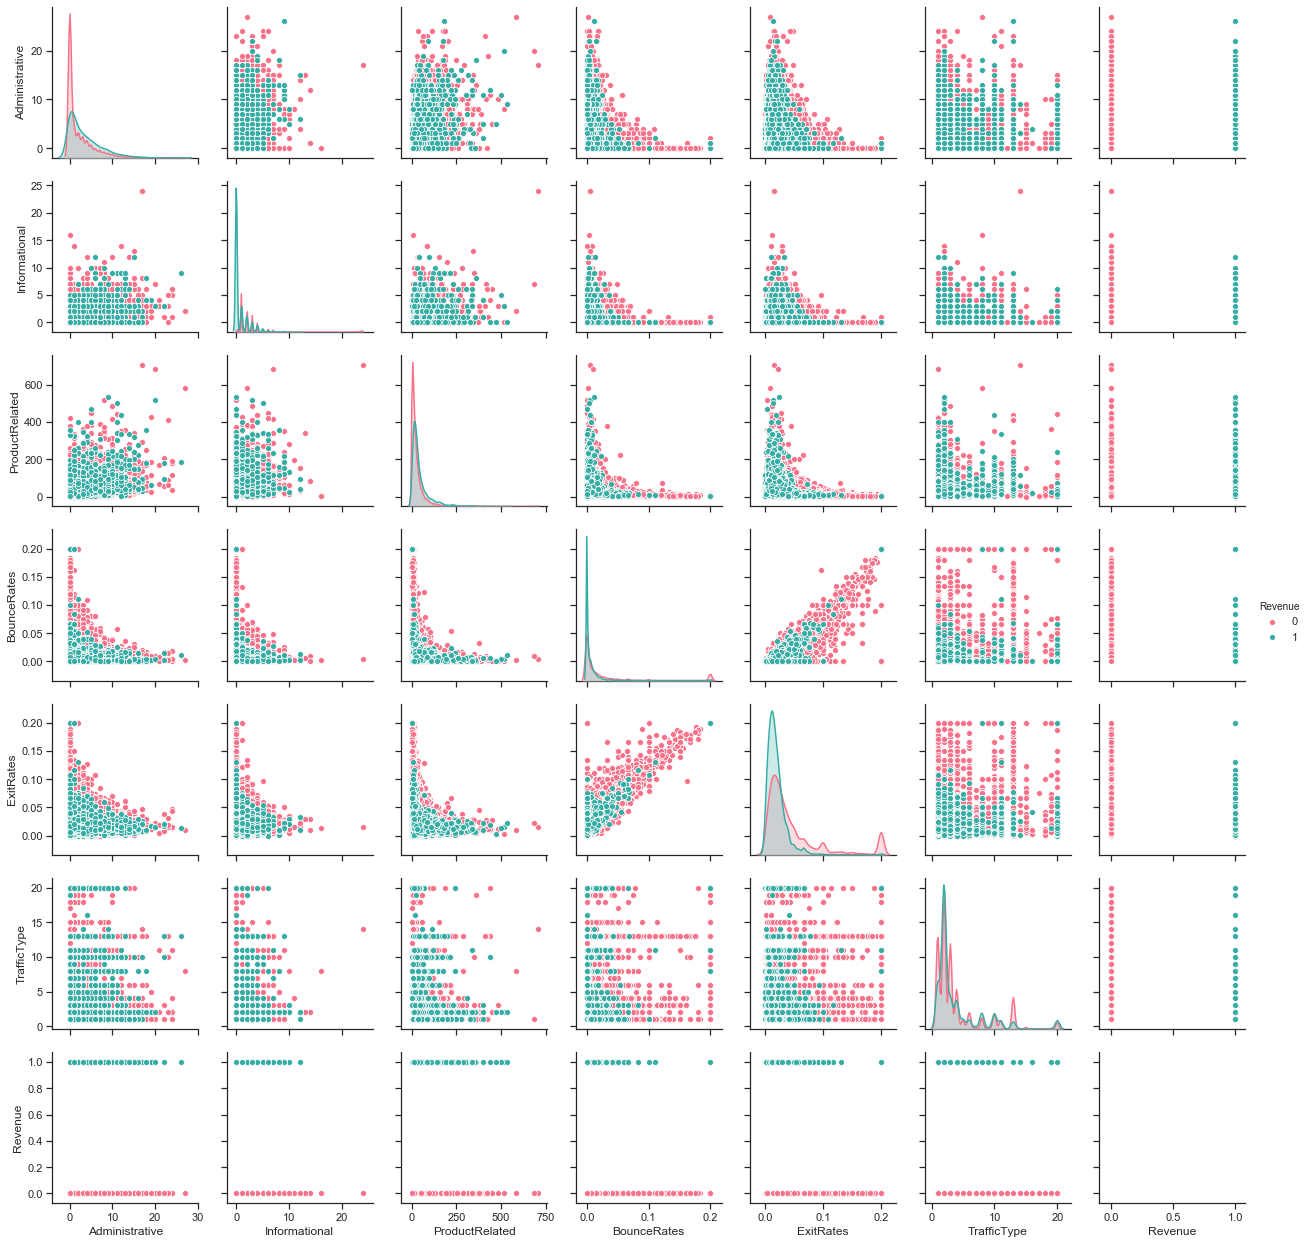

In [18]:
sns.set(style="ticks", color_codes=True)
graph = sns.pairplot(dfClass, hue='Revenue', palette = 'husl')

##### Barplot
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

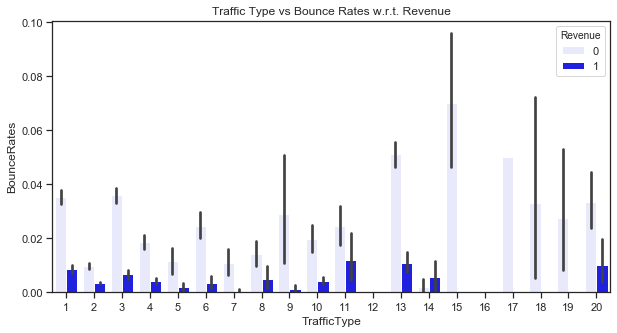

In [19]:
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(x = dfClass['TrafficType'], y = dfClass['BounceRates'], hue = dfClass['Revenue'], color="blue")
plt.title('Traffic Type vs Bounce Rates w.r.t. Revenue', fontsize = 12)
plt.show()

##### Distplot

It plots unvariate distribution of observations.

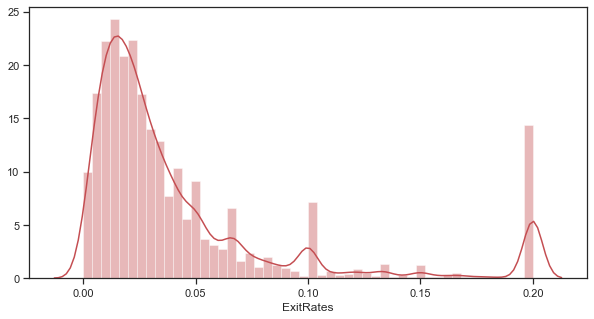

In [115]:
sns.distplot(dfClass['ExitRates'],color='r')

##### Heatmap

It is graphical representation of data using color code and color intensity system. It represents the correlation of the feature values in the data.

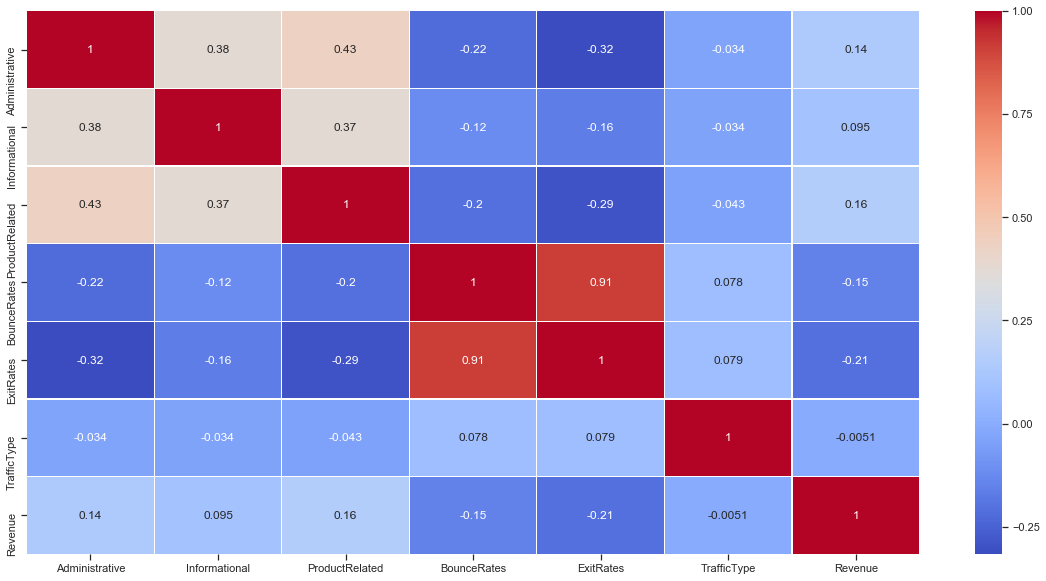

In [116]:
plt.figure(figsize=(20,10))
sns.heatmap(dfClass.corr(),annot=True, lineWidth = 0.25, cmap='coolwarm')

## Reading and Analyzing the plots

**Pairplot**: Distribution of single variables as well as relation between two variables is described through this graph. From the graph we can see that all the attributes are mapped to one another showing relation to eachother. As we have changed the value of revenue, weekend from object to numeric values 0 and 1, it's relation to other attributes reflects in that region only.

**Barplot**: The graph shows distribution revenue for the attributes Traffic Type and Bounce Rates. It is used as we want to compare revenue generated according to the Traffic Type and Bounce rates so we can predict the future revenue accurately based on the data.

**Distplot**: Distribution of a random variable is shown through this Distplot graph. Here the exit rates distribution is shown among its range of different values. It also shows the maximum and minimum density of exit rates in that particular area. The maximum density is between the values 0 to 0.05, where the exit rates are maximum.

**Heatmap**: From intensity of colors and the corresponding values between the attributes, we can know the co-relation among each variable. The diagonal shows mapping of each variable with itself and so the value is 1 i.e maximum correlation. Bounce rates and Exit rates have the maximum correlation (0.91) and Administrative and exit rates have the minimum correlation (-0.32) between them as we can see from the graph.

In [20]:
X_data = dfClass.iloc[:,0:6]
T_label = dfClass.iloc[:,6:]
X_data.head()

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,TrafficType
0,0,0,1,0.20,0.20,1
1,0,0,2,0.00,0.10,2
2,0,0,1,0.20,0.20,3
3,0,0,2,0.05,0.14,4
4,0,0,10,0.02,0.05,4


In [77]:
T_label.head()

,Revenue
0,0
1,0
2,0
3,0
4,0


### Explaination of Code


In [22]:
class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        expz = np.exp(z) 
        return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
                

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

In NeuralNetLogReg class, init function is a constructor of the class which calls the NeuralNet class' constructor for assigning values to the number of layers for the model where nLayers is the number of hidden unit layers, rho is the learning rate attribute of the class, W is the weights written in one dimension. stdX and stdT is the standardization class for the data and target respectively. <br>

The train function takes the features and target as input. The gradient unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda

Forward pass in neural network propagates same as in the class discussed above the only difference is that and an additional t=self.softmax(t) is added to the last layer. The last layer will be the softmax function which then gives output to the output layer. Activation function is used to make the network nonlinear. <br> 

Backward pass in neural network takes the the z values, target values and the error as input. Based on the delta value, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particualr layer. Below are the functions that are excecuted during backward pass. <br>

 $$
 W \leftarrow W + \alpha_o Zl^\top \Big(  T - g(X)\Big).
 $$


$$
 V \leftarrow V + \alpha_h Xl^\top \Big( (T - g(X)) W^\top \odot (1 - Z^2) \Big).
$$
 


In [23]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [24]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
from sklearn.metrics import roc_curve, auc

# Examination of correct implementation (NonlinearLogReg) with toy data.

Text(0.5, 1.0, 'test data set')

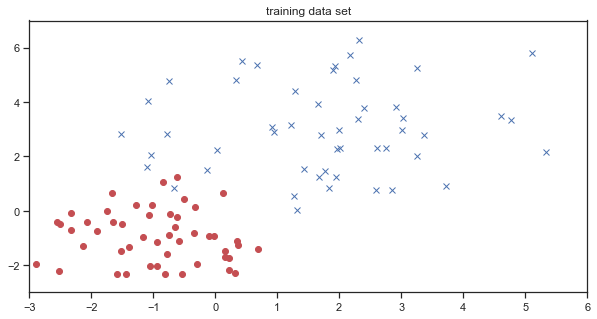

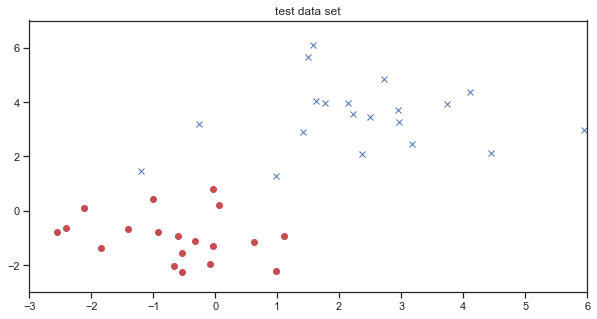

In [43]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [44]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


In [29]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [98]:
classes

array([[0.52042312, 0.47957688],
       [0.52039335, 0.47960665],
       [0.52036357, 0.47963643],
       ...,
       [0.4844577 , 0.5155423 ],
       [0.48444302, 0.51555698],
       [0.48442836, 0.51557164]])

Accuracy:  50.0 %


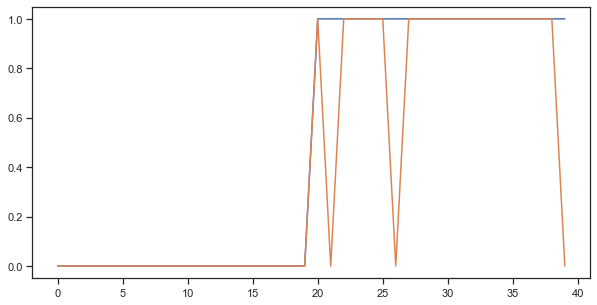

In [45]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

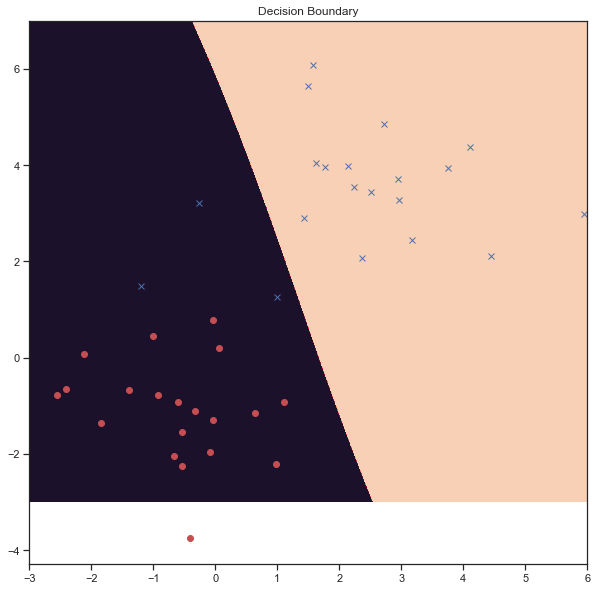

In [46]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(10,10))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

##### As it runs with almost 50% accuracy, we can say that the model for nonlinear logistic regression works without flaws.

# Testing on classification dataset

In [99]:
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(X_data, T_label,test_size=0.20,random_state=42)

In [100]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [122]:
nn = NeuralNetLogReg([6,4,2])
nn.train(sc.fit_transform(XTrain), T, niter=1000) 
p,l = nn.use(sc.fit_transform(XTest))

C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


# Presentation of CV results


In [139]:
models = [[9,3,1],[9,5,1],[9,7,1], [9,10,1], [9,12,1]]
bestAccuracy,bestParam = cross_validate(np.array(dfReg), np.array(dfReg_target), models)

Test number:  0
K is :  0
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.828830877828639, 4.76300820484108, 4.666133459887817, 4.5701485283922, 4.58782310152045]
4.5701485283922
[9, 10, 1]
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.82907255303688, 4.775537964029203, 4.670613691751619, 4.6620016916992855, 4.594728749199171]
4.594728749199171
[9, 12, 1]
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.911755859479417, 4.7786990333100885, 4.812701675443984, 4.6976336034250314, 4.688397879231256]
4.688397879231256
[9, 12, 1]
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[5.017808476300551, 4.769616375229238, 4.744384205149178, 4.734673246904702, 4.645501291492578]
4.645501291492578
[9, 12, 1]
[[9, 10, 1], [9, 12, 1], [9, 12, 1], [9, 12, 1]]
[4.5701485283922, 4.594728749199171, 4.688397879231256, 4.645501291492578]
[9, 3, 1]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  1
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.857004822797144, 4.722715274303601, 4.642406036331368, 4.5210105168147035, 4.468589941525586]
4.468589941525586
[9, 12, 1]
K is :  1
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.830585838596896, 4.765520173058466, 4.693102375527075, 4.626192175731248, 4.628880480043303]
4.626192175731248
[9, 10, 1]
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.943093050479356, 4.818523380259029, 4.7382809966611354, 4.693418838395215, 4.676077407633103]
4.676077407633103
[9, 12, 1]
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.893206207484637, 4.752093744926449, 4.7308681750484896, 4.670273275152809, 4.679493989695255]
4.670273275152809
[9, 10, 1]
[[9, 12, 1], [9, 10, 1], [9, 12, 1], [9, 10, 1]]
[4.468589941525586, 4.626192175731248, 4.676077407633103, 4.670273275152809]
[9, 3, 1]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  2
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.8683375875719275, 4.738533475528156, 4.617995960111041, 4.530134345572774, 4.470116759218412]
4.470116759218412
[9, 12, 1]
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.848957405057203, 4.730386565267395, 4.677767256403751, 4.6357862956888845, 4.649132122261087]
4.6357862956888845
[9, 10, 1]
K is :  2
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.938256555562712, 4.8520204602339545, 4.803157996488212, 4.686499924042968, 4.667432118334497]
4.667432118334497
[9, 12, 1]
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.894373542252748, 4.756902659635728, 4.707030167073617, 4.6864386603782116, 4.691052726826344]
4.6864386603782116
[9, 10, 1]
[[9, 12, 1], [9, 10, 1], [9, 12, 1], [9, 10, 1]]
[4.470116759218412, 4.6357862956888845, 4.667432118334497, 4.6864386603782116]
[9, 3, 1]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  3
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.84592663119504, 4.747679193475918, 4.6241196319047235, 4.567748571538215, 4.458275222398927]
4.458275222398927
[9, 12, 1]
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.842875027664719, 4.789094038864722, 4.655038307343112, 4.615846714425361, 4.599121909373627]
4.599121909373627
[9, 12, 1]
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.9025067623502805, 4.806035175040505, 4.736079535599252, 4.6574545251160435, 4.601324303775412]
4.601324303775412
[9, 12, 1]
K is :  3
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.917712453608308, 4.832793517461647, 4.70560495912991, 4.706186773545319, 4.641595531146375]
4.641595531146375
[9, 12, 1]
[[9, 12, 1], [9, 12, 1], [9, 12, 1], [9, 12, 1]]
[4.458275222398927, 4.599121909373627, 4.601324303775412, 4.641595531146375]
[9, 3, 1]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  4
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.858136001578016, 4.757497848740781, 4.627554654962684, 4.568359490085265, 4.479178267028888]
4.479178267028888
[9, 12, 1]
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.858115794121367, 4.750635866864584, 4.682025731416968, 4.60747739448383, 4.587717740720281]
4.587717740720281
[9, 12, 1]
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.864902813070716, 4.803493749189759, 4.676482375033894, 4.648178747207566, 4.553667212427908]
4.553667212427908
[9, 12, 1]
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Deskt

[[9, 3, 1], [9, 5, 1], [9, 7, 1], [9, 10, 1], [9, 12, 1]]
[4.9898936727547465, 4.779812761935966, 4.765312827061774, 4.646380169281587, 4.634087302740541]
4.634087302740541
[9, 12, 1]
K is :  4
[[9, 12, 1], [9, 12, 1], [9, 12, 1], [9, 12, 1]]
[4.479178267028888, 4.587717740720281, 4.553667212427908, 4.634087302740541]
[9, 3, 1]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


In [140]:
print(bestAccuracy,bestParam)

[4.935757476536001, 4.837738274089079, 4.902720810715665, 4.911732872560621, 4.898733978529472] [[9, 3, 1], [9, 3, 1], [9, 3, 1], [9, 3, 1], [9, 3, 1]]


In [141]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(dfReg),np.array(dfReg_target),test_size=0.30,random_state=40)

In [142]:
model=NeuralNet([9,3,1])  
model.train(X_train,y_train,niter=1000)

C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


{'w': array([ 1.29874954,  0.45223481,  1.5768345 , -4.20915916,  2.56314102,
         2.06931147, -0.11167838, -0.76158816,  1.14616178,  0.05832976,
        -0.1831197 , -0.41974384,  0.06581739,  1.42169051, -0.33561872,
         1.33344897, -1.96758922, -3.36371681,  3.53282656, -1.00349016,
         1.05068003, -0.10627454,  0.37202345, -0.05502759,  0.35462499,
        -0.14752513,  0.66610023,  0.23581691,  0.11029708,  0.07483957,
        -0.33196813, -1.29433874, -1.08663728,  1.88421317]),
 'f': 0.312541760191408,
 'reason': 'reached limit of nIterations',
 'wtrace': None,
 'ftrace': None}

In [143]:
y_pred=model.use(X_test)

In [144]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 4.890006253321028
R squared value: 0.36171276586712875


# Discussions about parameter/network structure choice

A 5 layered neural network is built here which has input layer of 6 nodes and Output layer has 2 node. It's training is not only limited to 5 layers as the process was repeated with many layers and it was interesting to find that 12 layers gave better results and but if we keep on increasing the layers there arises a problem of over-fitting as well. 

The trail for best network structure was done by changing the number of nodes in hidden layer for which 5 fold cross validation was performed by passing model variables as [[6,5,2], [6,7,2],[6,9,2], [6,12,2]] according to my data where first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes. 

From the results of cross validation we can see that model [6,12,2] has appeared more number of times. The f1 score values returned for [6,12,2] in the final result are [4.935757476536001, 4.837738274089079, 4.902720810715665] , and for [6, 9, 2] as 4.935757476536001. For, [6, 5, 2] it is 4.837738274089079.

The model with number of nodes in hidden layer 12 works better. With increasing layer the model keeps on improving With more number of nodes in hidden layer network its  overfitting the data.

Hence, I've used [6,12,2] as the final structure and I got F1 score: 0.43014724877292695 and Accuracy: 0.1613556223063863. 

# Plots for Results

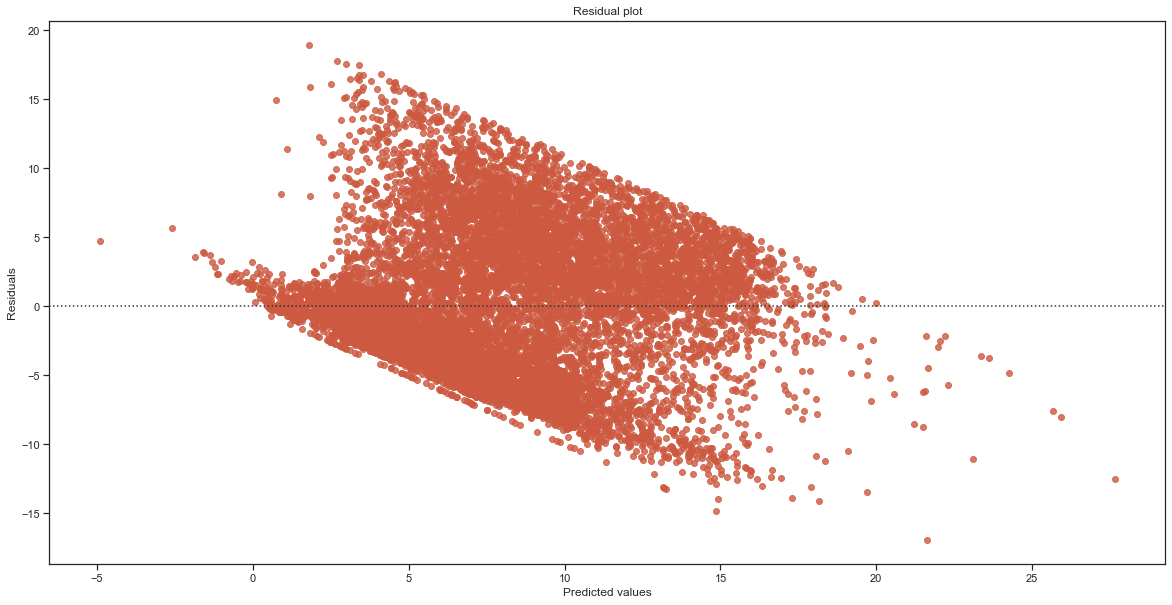

In [153]:
# Residual plot for LinearRegress model
sns.residplot(y_pred.flatten(), y_test.flatten(), color=(0.8, 0.35, 0.25))
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

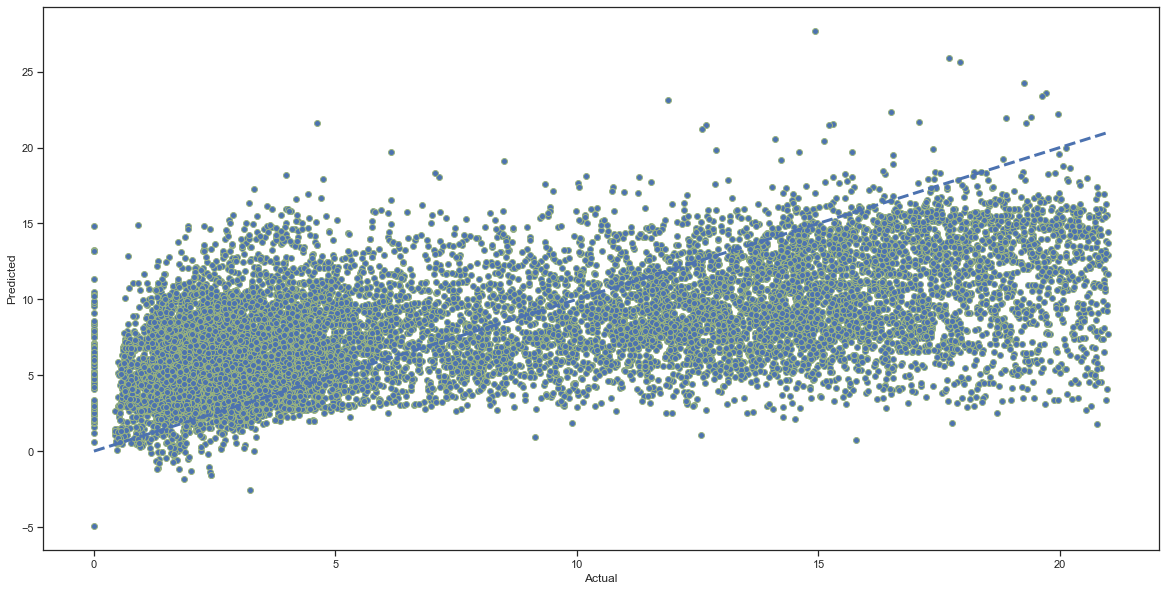

In [154]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0.6,0.7,0.5))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'b--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

Text(0.5, 1.0, 'NN model predictions')

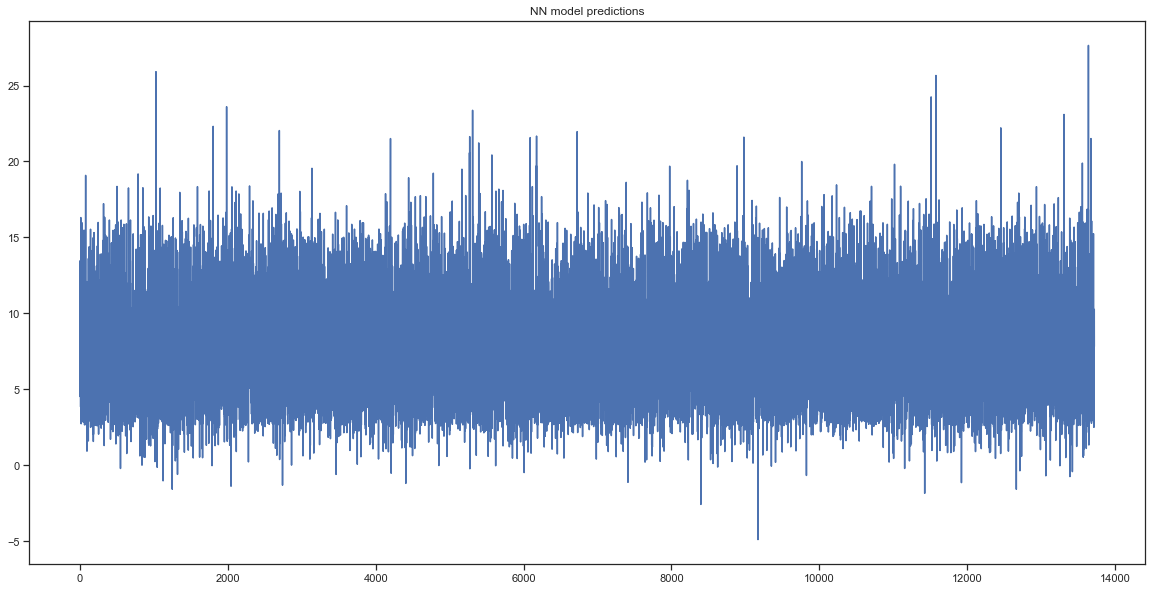

In [155]:
plt.plot(y_pred)
plt.title("NN model predictions")

## Explanation of CV results

A 3 layered neural network is built which has input layer of 9 nodes and Output layer of 1 node. The best network structure was found by changing the number of nodes in hidden layer where i performed 5 fold cross validation by passing my models variable as [[9, 7, 1], [9, 3, 1], [9, 3, 1], [9, 3, 1], [9, 3, 1]]. Here first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes. 

From the results of cross validation it was observed that model [9, 3, 1] appeared more number of times. The rmse values returned for [9, 3, 1] in the final result was 4.99213209411314 and the R squared value to be 0.33477361489146373.

The model with [9,3,1] as the final structure gives the best result as therefore it is chosen.

In [118]:
print('F1 score:', f1_score(YTest, l))
print('Accuracy:', accuracy_score(YTest, l))

F1 score: 0.2857142857142857
Accuracy: 0.16666666666666666


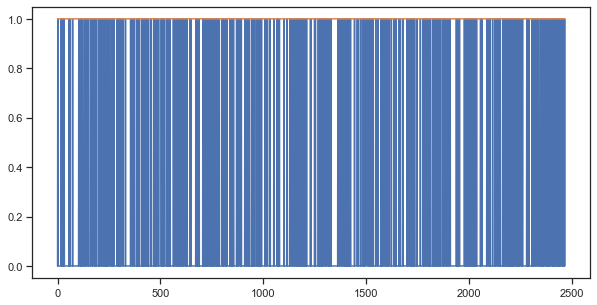

In [119]:
plt.plot(np.sort(YTest))
plt.plot(np.sort(l))

In [86]:
cf3=confusion_matrix(YTest, l)
cf3

array([[   0, 2055],
       [   0,  411]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix')

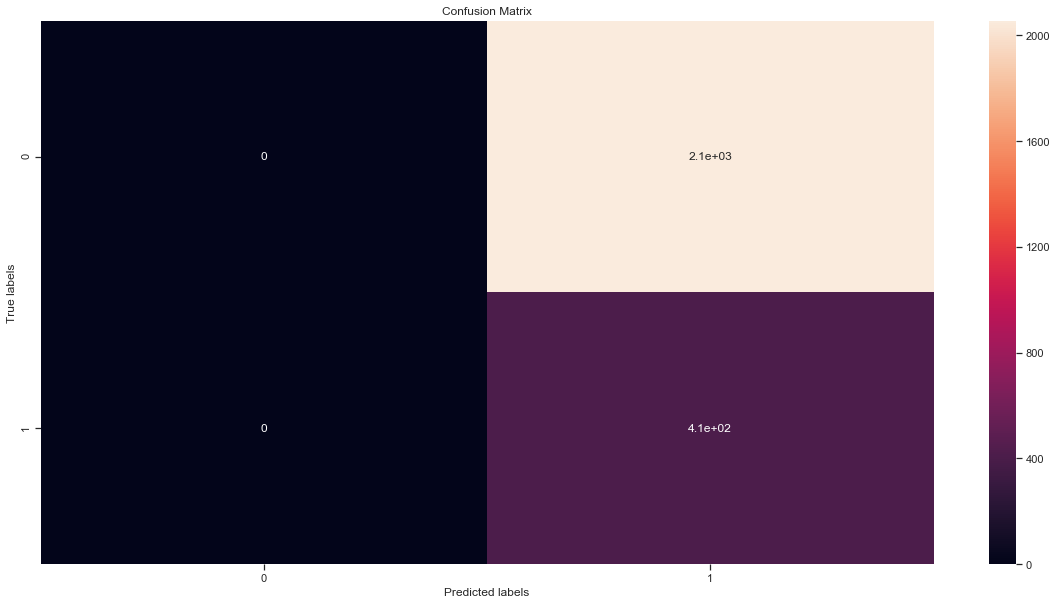

In [157]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

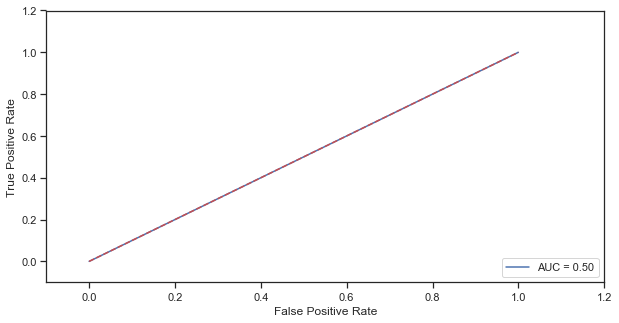

In [66]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(YTest, l)
roc_auc = auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

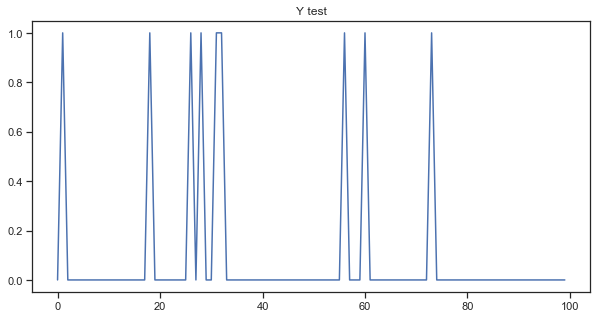

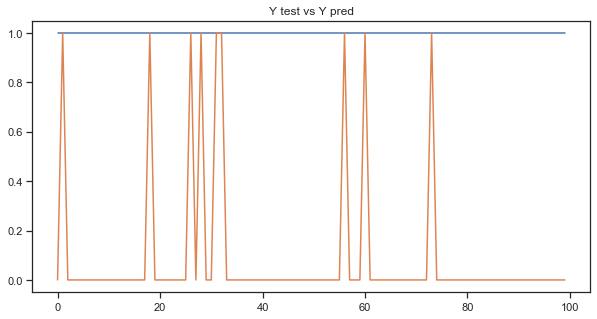

In [68]:
plt.title("Y test")
plt.plot(np.array(YTest[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(l[0:100])
plt.plot(np.array(YTest[0:100]))
plt.show()

## Cross validation code for nonlinear logistic regression 

In [89]:
def split(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

final_list=[]
best_paramlist=[]
def cross_validate(X, T, parameters):
    partitionedX = split(X)
    partitionedT = split(T)
    for test in range(5): 
        print("test",test)
        Xtest = partitionedX[test]
        Ttest = partitionedT[test]
        j = 0
        
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partitionedX[val]
            Tval = partitionedT[val]
            
            Xtrain = partitionedX[not test and not val]
            Ttrain = partitionedT[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrain, Ttrain)
                prob,pred = model.use(Xval)
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrain = partitionedX[not test]
        Ttrain = partitionedT[not test]
        bestModel.train(Xtrain, Ttrain)

        prob1,finalPred = bestModel.use(Xtest)
        Ttest1=Ttest[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        myf1 = f1_score(Ttest1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

##### Cross validation's implementation same as done earlier. The difference is that we'll be finding the parameters which gives maximum f1 score to our model. We keep on appending it out best list of parameters and best list of f1 score. Below is the implemented version of the CV along with the results of CV. 

In [90]:
nn = NeuralNetLogReg([6,4,2])
nn.train(sc.fit_transform(XTrain), T, niter=1000) 
p,l = nn.use(sc.fit_transform(XTest))

C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


In [145]:
T = add_ones(np.array(T_label).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [146]:
models = [[6,5,2], [6,7,2],[6,9,2], [6,12,2]]
bestAccuracy,bestParam = (cross_validate(np.array(X_data), T, models))

Test number:  0
K is :  0
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
[[6, 5, 2], [6, 5, 2], [6, 5, 2], [6, 5, 2]]
[0.0, 0.0, 0.0, 0.0]
[6, 5, 2]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  1
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  1
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
[[6, 5, 2], [6, 5, 2], [6, 5, 2], [6, 5, 2]]
[0.0, 0.0, 0.0, 0.0]
[6, 5, 2]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  2
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  2
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
[[6, 5, 2], [6, 5, 2], [6, 5, 2], [6, 5, 2]]
[0.0, 0.0, 0.0, 0.0]
[6, 5, 2]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  3
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  3
K is :  4


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
[[6, 5, 2], [6, 5, 2], [6, 5, 2], [6, 5, 2]]
[0.0, 0.0, 0.0, 0.0]
[6, 5, 2]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


Test number:  4
K is :  0


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  1


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  2


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  3


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
C:

[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
[0.0, 0.0, 0.0, 0.0]
0.0
[6, 5, 2]
K is :  4
[[6, 5, 2], [6, 5, 2], [6, 5, 2], [6, 5, 2]]
[0.0, 0.0, 0.0, 0.0]
[6, 5, 2]


C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\util.py:19: RuntimeWarning: invalid value encountered in true_divide
  return (X - self._mu) / self._sigma
C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


In [147]:
print(bestAccuracy)
print(bestParam)

[4.935757476536001, 4.837738274089079, 4.902720810715665, 4.911732872560621, 4.898733978529472, 0.0, 0.0, 0.0, 0.0, 0.0]
[[9, 3, 1], [9, 3, 1], [9, 3, 1], [9, 3, 1], [9, 3, 1], [6, 5, 2], [6, 5, 2], [6, 5, 2], [6, 5, 2], [6, 5, 2]]


In [148]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [149]:
nn = NeuralNetLogReg([6,12,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))

C:\Users\Dell\Desktop\UNCC Notes\Machine Learning\Neural Network\nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


In [163]:
y_pred1=l
print('F1 score:', f1_score(YTest, y_pred1))
print('Accuracy:', accuracy_score(YTest, y_pred1))

F1 score: 0.2857142857142857
Accuracy: 0.16666666666666666


# Discussion about the prediction results and analyzing what nonlinear regression model learned.

Nonlinear logistic regression analysis was done using Neural network which is nonlinear regression problem. 
On training the model using NeuralNetLogReg with optimum structure [6,12,2], model has produced F1 score: 0.2857142857142857 and Accuracy: 0.16666666666666666 with optim="scg."

Each node is connected to a activation function which makes the network more powerful. We are free to choose hidden layers, hidden nodes that suits our problem. Here softmax is used as an activation function for the last layer of the neural network. Weights are updated by the gradient in each layer during back propagation causing the metwork to work efficiently.

The accuracy seemed to be increasing with the increase in number of layers but it has a limitation because if we keep on increasing the number of layers beyond a point, the issue of overfitting arises in our neural network model and thus it is very important to choose wisely. 

# Conclusions

From this Neural Network Assignment, we get a lot of learning and clarity into how it can be used for solving complex problems. <br/>
<br/>
The main advantages of using Neural Networks include: <br/>
-> it can handle large amount of data sets <br/>
-> it has the ability to implicitly detect complex nonlinear relationships between dependent and independent variables <br/>
-> it has ability to detect all possible interactions between predictor variables <br/>
<br/>
Implementation of K Fold Cross Validation from scratch was very useful in understanding the concept and in selecting the parameters. I also learnt that if we have smaller data it can be useful to benefit from k-fold cross-validation to maximize our ability to evaluate the neural network’s performance. A better understanding of the scenario which may cause over-fitting was encountered, where i deduced that it is not always necessary to get improvised model by increasing the number of layers. Choosing proper activation function and keeping track of the indices while implementing neural network algorithms and cross validation was a bit challenging.


# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

# References

1. Prashant Singh Rana, ABV - Indian Institute of Information Technology & Management, Gwalior, MP, India

3. Goodfellow, Ian, et al. Deep Learning. The MIT Press, 2017, http://www.deeplearningbook.org.

4. “Creating Annotated Heatmaps.” Creating Annotated Heatmaps - Matplotlib 3.1.1 Documentation, https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html.

5. “Seaborn.pairplot.” Seaborn.pairplot - Seaborn 0.9.0 Documentation, https://seaborn.pydata.org/generated/seaborn.pairplot.html.

6. “Seaborn.lmplot.” Seaborn.lmplot - Seaborn 0.9.0 Documentation, https://seaborn.pydata.org/generated/seaborn.lmplot.html.

7. "Cross-Validation (Statistics)". En.Wikipedia.Org, 2019, https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29#cite_note-4

8. Mathworks.com. (2019). Nonlinear Regression. [online] Available at: https://www.mathworks.com/discovery/nonlinear-regression.html#:~:targetText=Nonlinear%20regression%20is%20a%20statistical,for%20non%2Dparametric%20nonlinear%20regression.

9. “Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.Sol.ipynb



## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
